In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from google.colab import files
import io  
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
uploaded = files.upload()

Saving train.csv to train (4).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(df)

        ID   Age  ... Attrition  YearsAtCompany
0        1  44.0  ...         1              20
1        2  25.0  ...         0               6
2        3  57.0  ...         0               1
3        4  47.0  ...         0              17
4        5  22.0  ...         1               1
...    ...   ...  ...       ...             ...
1225  1226  29.0  ...         1               7
1226  1227  41.0  ...         0              20
1227  1228  36.0  ...         1               2
1228  1229  23.0  ...         0               3
1229  1230  31.0  ...         1              10

[1230 rows x 44 columns]


In [ ]:
a=df.iloc[:,2]
b=df.iloc[:,4]
c=df.iloc[:,6]
d=df.iloc[:,10]
e=df.iloc[:,12]
f=df.iloc[:,16]
g=df.iloc[:,17]
h=df.iloc[:,32]
le = preprocessing.LabelEncoder()
label1=le.fit_transform(a)
label2=le.fit_transform(b)
label3=le.fit_transform(c)
label4=le.fit_transform(d)
label5=le.fit_transform(e)
label6=le.fit_transform(f)
label7=le.fit_transform(g)
label8=le.fit_transform(h)
label9=df['Attrition']
label10=df['YearsAtCompany']

In [ ]:
df['Travel']=label1
df['Dept']=label2
df['Gend']=label3
df['Role']=label4
df['Status']=label5
df['Above18']=label6
df['Time']=label7
df['EducationFieldNew']=label8
del df['BusinessTravel']
del df['Department']
del df['Gender']
del df['JobRole']
del df['MaritalStatus']
del df['Over18']
del df['OverTime']
del df['EducationField']
del df['YearsAtCompany']
del df['Attrition']
df['Attrition']=label9
df['YearsAtCompany']=label10

In [ ]:
#df=df.fillna(0)
df=df.dropna()

In [ ]:
X = df.iloc[:,:42]
y = df.iloc[:,-1]

[0.02293902 0.02806107 0.02283626 0.02288939 0.02338567 0.01823748
 0.02193036 0.0224187  0.02767637 0.02259691 0.03042746 0.02172693
 0.00926683 0.02188137 0.         0.02351313 0.02195416 0.02104854
 0.05173701 0.01959076 0.         0.01741758 0.05968088 0.01950584
 0.02142497 0.         0.02314019 0.02057475 0.01786519 0.09097669
 0.05047558 0.08494869 0.         0.0219781  0.01696309 0.01493442
 0.01414105 0.02025803 0.01879306 0.         0.01434443 0.01846006]


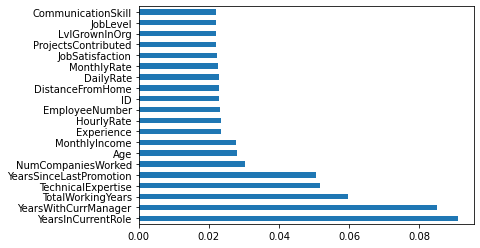

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
feat_importances.index

Index(['ID', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'CommunicationSkill', 'Behaviour', 'Experience',
       'LvlGrownInOrg', 'ContributionIndex', 'TechnicalExpertise',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'FormalWarnings', 'ProjectsContributed',
       'Travel', 'Dept', 'Gend', 'Role', 'Status', 'Above18', 'Time',
       'EducationFieldNew'],
      dtype='object')

In [ ]:
feat_importances

ID                          0.022939
Age                         0.028061
DailyRate                   0.022836
DistanceFromHome            0.022889
HourlyRate                  0.023386
JobInvolvement              0.018237
JobLevel                    0.021930
JobSatisfaction             0.022419
MonthlyIncome               0.027676
MonthlyRate                 0.022597
NumCompaniesWorked          0.030427
PercentSalaryHike           0.021727
PerformanceRating           0.009267
CommunicationSkill          0.021881
Behaviour                   0.000000
Experience                  0.023513
LvlGrownInOrg               0.021954
ContributionIndex           0.021049
TechnicalExpertise          0.051737
RelationshipSatisfaction    0.019591
StandardHours               0.000000
StockOptionLevel            0.017418
TotalWorkingYears           0.059681
TrainingTimesLastYear       0.019506
Education                   0.021425
EmployeeCount               0.000000
EmployeeNumber              0.023140
E

In [ ]:
feat_importances=feat_importances.sort_values(ascending=False)

In [ ]:
dfnew = pd.DataFrame() 
print(dfnew)

Empty DataFrame
Columns: []
Index: []


In [ ]:
dfnew['YearsInCurrentRole']=df['YearsInCurrentRole']
dfnew['YearsWithCurrManager']=df['YearsWithCurrManager']
dfnew['TotalWorkingYears']=df['TotalWorkingYears']
dfnew['YearsSinceLastPromotion']=df['YearsSinceLastPromotion']
dfnew['TechnicalExpertise']=df['TechnicalExpertise']
dfnew['NumCompaniesWorked']=df['NumCompaniesWorked']
dfnew['MonthlyIncome']=df['MonthlyIncome']
dfnew['Age']=df['Age']
dfnew['YearsAtCompany']=df['YearsAtCompany']

In [ ]:
dfnew

,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears,YearsSinceLastPromotion,TechnicalExpertise,NumCompaniesWorked,MonthlyIncome,Age,YearsAtCompany
0,6,6,24.0,3.0,9,9.0,10482,44.0,20
1,3,5,6.0,1.0,7,1.0,4000,25.0,6
2,0,0,32.0,0.0,0,3.0,14118,57.0,1
3,14,11,25.0,12.0,11,2.0,8633,47.0,17
4,0,0,1.0,0.0,0,1.0,2472,22.0,1
...,...,...,...,...,...,...,...,...,...
1225,7,7,10.0,7.0,6,3.0,3339,29.0,7
1226,7,10,21.0,0.0,70,0.0,13570,41.0,20
1227,2,2,16.0,2.0,1,5.0,6134,36.0,2
1228,2,2,5.0,0.0,4,2.0,2819,23.0,3


In [ ]:
X = dfnew.iloc[:,0:8].values
y = dfnew.iloc[:,-1].values

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X, y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
uploaded = files.upload()

Saving test.csv to test (3).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print(df)

      ID  Age  ... FormalWarnings  ProjectsContributed
0      1   27  ...              0                 14.0
1      2   26  ...              0                 30.0
2      3   50  ...              0                  3.0
3      4   41  ...              0                 11.0
4      5   28  ...              0                 10.0
..   ...  ...  ...            ...                  ...
235  236   59  ...              0                 16.0
236  237   37  ...              0                 13.0
237  238   37  ...              0                 10.0
238  239   44  ...              0                  7.0
239  240   28  ...              0                 28.0

[240 rows x 42 columns]


In [ ]:
a=df.iloc[:,2]
b=df.iloc[:,4]
c=df.iloc[:,6]
d=df.iloc[:,10]
e=df.iloc[:,12]
f=df.iloc[:,16]
g=df.iloc[:,17]
h=df.iloc[:,32]
le = preprocessing.LabelEncoder()
label1=le.fit_transform(a)
label2=le.fit_transform(b)
label3=le.fit_transform(c)
label4=le.fit_transform(d)
label5=le.fit_transform(e)
label6=le.fit_transform(f)
label7=le.fit_transform(g)
label8=le.fit_transform(h)

In [ ]:
df['Travel']=label1
df['Dept']=label2
df['Gend']=label3
df['Role']=label4
df['Status']=label5
df['Above18']=label6
df['Time']=label7
df['EducationFieldNew']=label8
del df['BusinessTravel']
del df['Department']
del df['Gender']
del df['JobRole']
del df['MaritalStatus']
del df['Over18']
del df['OverTime']
del df['EducationField']


In [ ]:
df

,ID,Age,DailyRate,DistanceFromHome,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,CommunicationSkill,Behaviour,Experience,LvlGrownInOrg,ContributionIndex,TechnicalExpertise,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,FormalWarnings,ProjectsContributed,Travel,Dept,Gend,Role,Status,Above18,Time,EducationFieldNew
0,1,27,591,2,40,3,1,2,3468,16632,9,12,3.0,1,1,26931.0,3,4137,1,4,80,1.0,6,3,1,1,7.0,1,3,2,2,2,0,14.0,2,1,1,2,1,0,0,3
1,2,26,1443,23,47,2,2,4,4157,21436,7,19,3.0,3,1,8157.0,2,10101,0,3,80,1.0,5,2,3,1,72.0,3,2,2,0,0,0,30.0,2,2,0,7,1,0,1,2
2,3,50,328,1,86,2,1,3,3690,3425,2,15,3.0,1,1,7766.0,6,2296,4,4,80,1.0,5,2,3,1,249.0,3,2,2,0,2,0,3.0,2,1,1,2,1,0,0,3
3,4,41,1102,1,94,3,2,4,5993,19479,8,11,3.0,4,1,39304.0,1,7714,20,1,80,0.0,8,0,2,1,1.0,2,1,4,0,5,0,11.0,2,2,0,7,2,0,1,1
4,5,28,440,21,42,3,1,4,2713,6672,1,11,3.0,5,1,38389.0,1,3080,4,3,80,1.0,5,2,3,1,221.0,3,1,2,0,2,0,10.0,2,1,1,6,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,59,1324,3,81,4,1,1,2670,9964,4,20,4.0,1,1,14562.0,5,9268,0,1,80,3.0,12,3,3,1,10.0,3,2,0,0,0,0,16.0,2,1,0,2,1,0,1,3
236,237,37,1189,3,87,3,3,4,7428,14506,2,12,3.0,1,1,16985.0,4,8323,4,1,80,0.0,12,3,3,1,152.0,3,3,3,1,3,0,13.0,2,2,1,7,2,0,0,1
237,238,37,1040,2,100,2,2,4,5163,15850,5,14,3.0,3,1,40109.0,3,7280,0,4,80,1.0,17,2,2,1,139.0,3,4,0,0,0,0,10.0,0,1,1,0,0,0,0,1
238,239,44,489,23,67,3,2,2,2042,25043,4,12,3.0,2,1,36368.0,6,3423,2,3,80,1.0,17,3,3,1,132.0,2,4,2,1,2,0,7.0,0,1,1,2,1,0,0,3


In [ ]:
df=df.fillna(0)

In [ ]:
X = df.iloc[:,:42]

In [ ]:
dfnew = pd.DataFrame() 
print(dfnew)

Empty DataFrame
Columns: []
Index: []


In [ ]:
dfnew['YearsInCurrentRole']=df['YearsInCurrentRole']
dfnew['YearsWithCurrManager']=df['YearsWithCurrManager']
dfnew['TotalWorkingYears']=df['TotalWorkingYears']
dfnew['YearsSinceLastPromotion']=df['YearsSinceLastPromotion']
dfnew['TechnicalExpertise']=df['TechnicalExpertise']
dfnew['NumCompaniesWorked']=df['NumCompaniesWorked']
dfnew['MonthlyIncome']=df['MonthlyIncome']
dfnew['Age']=df['Age']


In [ ]:
dfnew

,YearsInCurrentRole,YearsWithCurrManager,TotalWorkingYears,YearsSinceLastPromotion,TechnicalExpertise,NumCompaniesWorked,MonthlyIncome,Age
0,2,2,6,2,1,9,3468,27
1,2,0,5,0,0,7,4157,26
2,2,2,5,0,4,2,3690,50
3,4,5,8,0,20,8,5993,41
4,2,2,5,0,4,1,2713,28
...,...,...,...,...,...,...,...,...
235,0,0,12,0,0,4,2670,59
236,3,3,12,1,4,2,7428,37
237,0,0,17,0,0,5,5163,37
238,2,2,17,1,2,4,2042,44


In [ ]:
X = dfnew.iloc[:,:].values

In [ ]:
pred = regressor.predict(X)

In [ ]:
pred=np.around(pred)
pred = pred.astype(int)
pred.size

240

In [ ]:
df = pd.DataFrame(pred)
df.to_csv('myfile.csv')

In [ ]:
pred

array([ 2,  4,  3,  6,  4,  1,  6,  5, 15,  2,  2,  4,  3,  1, 16,  5,  2,
        4,  3,  5, 10,  8,  1,  5,  0,  3,  8,  7,  2,  5,  5,  1,  1,  2,
       13,  1,  9,  5,  2,  6, 15, 13,  8, 34,  2,  1,  3,  0,  1,  5,  9,
        9,  8,  2,  7,  0, 33, 11,  5, 21, 10, 10,  9,  4, 19,  1, 11, 11,
       10,  2, 16,  1, 24,  7,  4,  4,  1, 20,  3,  4,  7,  5,  4, 20, 17,
        3,  9,  3, 22, 15, 16,  8,  4,  2, 10,  1,  5, 34,  1, 11,  7,  8,
       13, 10,  4,  2, 33,  1,  5,  9,  8,  4, 10, 10,  8,  8, 14, 10,  3,
        2,  2,  1, 15, 19,  8,  1,  6,  9,  1,  5,  1,  2, 11, 12,  5, 10,
       15,  5, 25,  2,  7,  9,  1,  1, 21, 13,  9,  3,  5, 14,  5,  5, 19,
       11,  9,  9,  2,  9,  5,  3,  5,  1,  9,  4,  6,  0, 22,  4,  1,  1,
        6, 10,  1,  6, 11,  1,  5, 15,  4, 21, 14, 12,  1,  4, 17,  7,  1,
        0,  4,  2,  5,  5,  1,  9, 10,  5,  8,  5, 11,  7,  2,  8,  5,  7,
        7,  1,  3,  5, 16,  6,  6,  7, 11,  3,  5, 10, 10,  1,  4,  9,  4,
       18,  9,  3,  4,  8